In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import joblib
import numpy as np
import time
from PIL import Image, ImageEnhance, ImageOps

Precisión del modelo Decision Tree: 82.31%
Modelo Decision Tree guardado en: dt_model.joblib


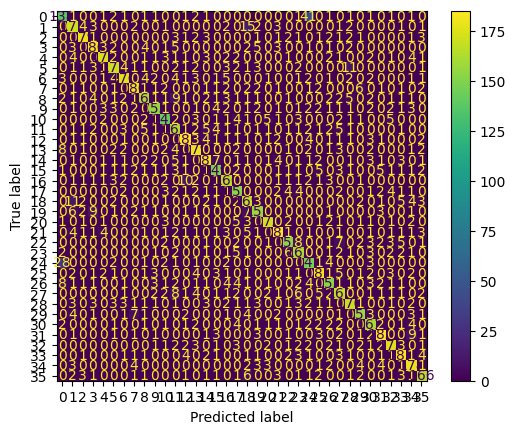

Tiempo de entrenamiento del modelo Decision Tree: 12.12 segundos


In [19]:

# Cargar datos desde el archivo CSV
dataset = np.loadtxt("dataset.csv", delimiter=',')

# Separar etiquetas y píxeles
labels = dataset[:, 0].astype(int)
pixels = dataset[:, 1:] / 255.0  # Normalizar píxeles

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(pixels, labels, test_size=0.2, random_state=42)

# Inicializar el clasificador Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)

# Medir el tiempo de entrenamiento
start_time = time.time()
# Entrenar el modelo
dt_classifier.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time

# Guardar el modelo entrenado en un archivo
model_filename_dt = "dt_model.joblib"
joblib.dump(dt_classifier, model_filename_dt)

# Realizar predicciones en el conjunto de prueba
predictions_dt = dt_classifier.predict(X_test)

# Calcular la precisión del modelo
accuracy_dt = accuracy_score(y_test, predictions_dt)
print(f'Precisión del modelo Decision Tree: {accuracy_dt * 100:.2f}%')

# Imprimir el nombre del archivo donde se guardó el modelo
print(f'Modelo Decision Tree guardado en: {model_filename_dt}')

# Plotear la matriz de confusión
conf_matrix = confusion_matrix(y_test, predictions_dt)
# plt.figure(figsize=(10, 8))
# plt.title('Matriz de Confusión - Decision Tree')

cm = confusion_matrix(y_test, predictions_dt)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()


# Imprimir el tiempo de entrenamiento
print(f'Tiempo de entrenamiento del modelo Decision Tree: {training_time:.2f} segundos')


In [13]:

# Mapeo de números a letras
number_to_letter = {10: 'A', 11: 'B', 12: 'C', 13: 'D', 14: 'E', 15: 'F', 16: 'G',
                    17: 'H', 18: 'I', 19: 'J', 20: 'K', 21: 'L', 22: 'M', 23: 'N',
                    24: 'O', 25: 'P', 26: 'Q', 27: 'R', 28: 'S', 29: 'T', 30: 'U',
                    31: 'V', 32: 'W', 33: 'X', 34: 'Y', 35: 'Z'}

def number_to_letter_mapping(number):
    return number_to_letter.get(number, str(number))

# Preprocesamiento de una única imagen de letra para Decision Tree
def preprocess_image_dt(input_path, output_path, vertical_padding):
    input_image = Image.open(input_path).convert('L')

    # Aumentar contraste
    enhancer = ImageEnhance.Contrast(input_image)
    contrasted_image = enhancer.enhance(2.0)

    final_image = contrasted_image

    # Redimensionar manteniendo la relación de aspecto
    aspect_ratio = final_image.width / final_image.height
    new_width = int(28 * aspect_ratio)  # Cambiado a 28 para coincidir con el tamaño de entrada de Decision Tree
    resized_image = final_image.resize((new_width, 28), Image.LANCZOS)

    # Aplicar padding
    horizontal_padding = (28 - resized_image.width) // 2
    padded_image = ImageOps.expand(resized_image, border=(horizontal_padding, vertical_padding), fill='white')

    # Redimensionar al tamaño final
    final_image = padded_image.resize((28, 28), Image.LANCZOS)

    # Guardar la imagen resultante
    final_image.save(output_path)

# Predicción de la etiqueta con el modelo Decision Tree
def predict_label_dt(image_pixels, model):
    predicted_label = model.predict([image_pixels])[0]
    return predicted_label

# Cargar el modelo entrenado (Decision Tree)
model_filename_dt = "dt_model.joblib"
dt_model = joblib.load(model_filename_dt)

# Ruta de la imagen de la letra
letter_image_path = "images/m.jpg"

# Ruta para la imagen preprocesada para Decision Tree
preprocessed_image_path_dt = "./letra_preprocesada_dt.png"

# Preprocesar la imagen de la letra para Decision Tree
preprocess_image_dt(letter_image_path, preprocessed_image_path_dt, 4)

# Leer píxeles de la imagen preprocesada
letter_image_pixels_dt = np.array(Image.open(preprocessed_image_path_dt)) / 255.0

# Realizar la predicción con el modelo Decision Tree
predicted_label_dt = predict_label_dt(letter_image_pixels_dt.flatten(), dt_model)

# Convertir el número de etiqueta a letra o número según corresponda
predicted_output_dt = number_to_letter_mapping(predicted_label_dt)

# Imprimir la letra o número predicho por Decision Tree
print("Carácter predicho por Decision Tree:", predicted_output_dt)


Carácter predicho por Decision Tree: W
